# Ejercicio
Realice  las  operaciones  necesarias  (incluyendo  operaciones  morfológicas  y  de segmentación)  sobre  la  imagen  objects.png  para  conservar  únicamente  los  dos bolígrafos  preservando  sus  niveles  de  gris  originales  (el  resto  de  la  imagen  debe quedar negra).

<p align="center">
  <img src="./imgs/OBJECTS.png" />
</p>

## Importaciones

In [67]:
from skimage import color
from skimage.filters import threshold_otsu, sobel
from skimage.morphology import label
import matplotlib.pyplot as plt
import numpy as np

## Funciones

In [68]:
def comparar_images(imagen1, imagen2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(imagen1, cmap='gray')
  ax1.set_title('Imagen Original')
  ax1.axis('off')

  ax2.imshow(imagen2, cmap='gray')
  ax2.set_title('Imagen Procesada')
  ax2.axis('off')

  plt.show()

In [69]:
# Función para obtener una máscara con los objetos seleccionados
def obtener_mascara(l, indices):
  """
  Genera una máscara binaria con los objetos seleccionados.

  :param indices: Lista de índices de etiquetas a incluir en la máscara.
  :return: Imagen binaria con los objetos seleccionados.
  """
  mask = np.isin(l, indices).astype(int)
  return mask

## Solucion

### Preparacion imagen

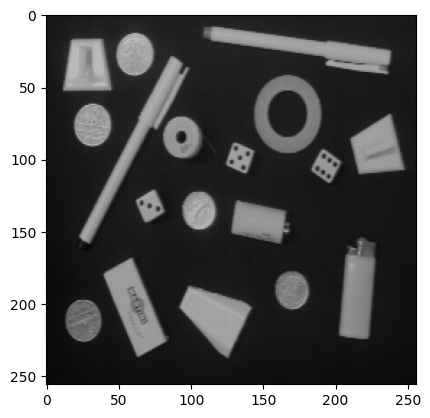

In [70]:
imagen_objetos  = plt.imread("./imgs/OBJECTS.png")
plt.imshow(imagen_objetos)

In [71]:
# Conversión a escala de grises
escalagris = color.rgb2gray(color.rgba2rgb(imagen_objetos))

### Procesamiendo de la imagen

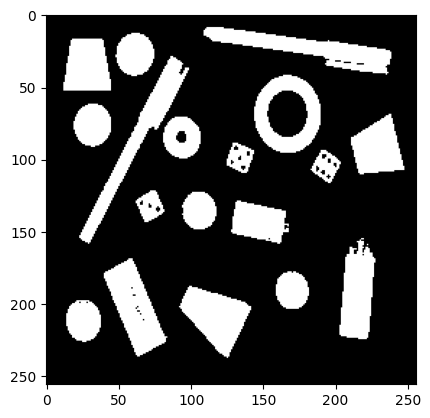

In [72]:
# Cálculo del umbral optimo
umbral = threshold_otsu(escalagris)

# Binarización
bin = escalagris > umbral
plt.imshow(bin, cmap='gray')

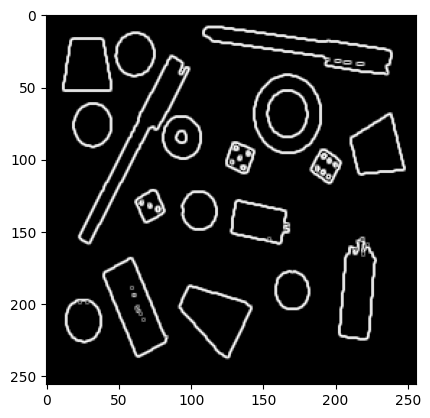

In [73]:
# Obtener bordes
bordes = sobel(bin)
plt.imshow(bordes, cmap='gray')

### Seleccion de los boligrafos

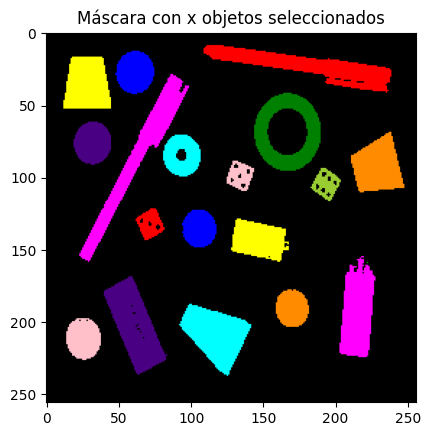

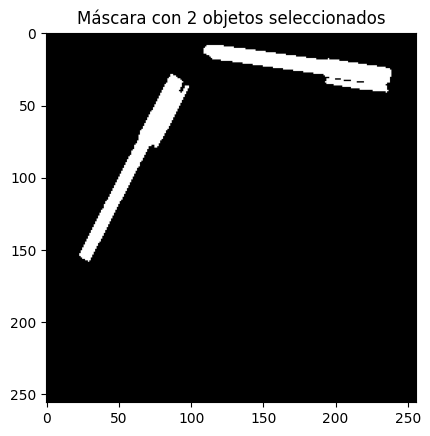

In [77]:
# Encontrar las regiones mas grandes
l = label(bin)

plt.figure()
plt.imshow(color.label2rgb(l, bg_label=0), cmap='gray')
plt.title(f"Máscara con x objetos seleccionados")
plt.show()

# Contar las areas de la imagen binaria
label_counts = np.bincount(l.ravel())

# Quitar el fondo
label_counts[0] = 0

# Obtener los indices de los boligrafos
indices_objetos = [1, 4]
boligrafos = obtener_mascara(l, indices_objetos)

plt.figure()
plt.imshow(boligrafos, cmap='gray')
plt.title(f"Máscara con {len(indices_objetos)} objetos seleccionados")
plt.show()

### Mantener color original de los boligrafos

In [75]:
solo_boligrafos = escalagris * boligrafos

### Resultado Final

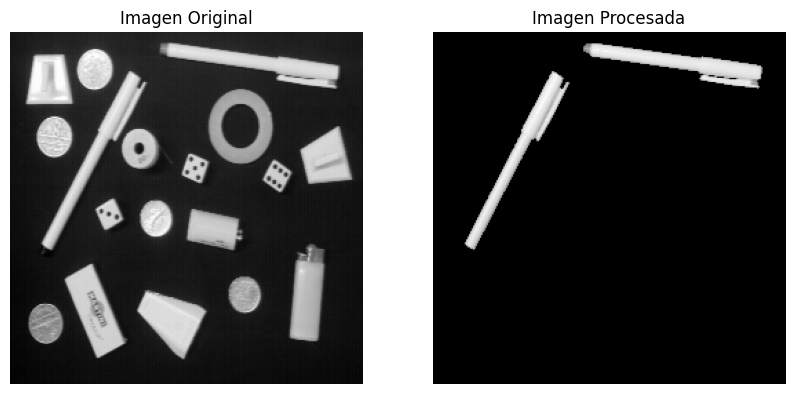

In [76]:
comparar_images(escalagris, solo_boligrafos)